#**Import and install dependencies on colab**

In [ ]:
!pip install umap-learn
!pip install phate scprep s_gd2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn import decomposition
cmap='BuGn_r'
lol= ['#a61551','#d9424d','#f67b4a','#febf6f','#feefa4','#f2f9a9','#bee5a0','#75c8a5','#388eba','#5e50a2']    


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=144c762c86f9b591f95fcef0f1297a0bf2b67fa8065abb1d1ca230eaa3e57e4e
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=99cf2b4bd15efce4a18b68d8888370e66b90493de0156253a9f504f0d197f0d1
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

MNIST DATA SET

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import umap

sns.set(context="paper", style="white")

mnist = fetch_openml("mnist_784", version=1)
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, stratify=mnist.target, random_state=42,train_size=0.9
)

In [ ]:

sns.set(context="paper", style="white")

SGD ALGORITHM

In [ ]:
import s_gd2
from scipy.spatial.distance import pdist, squareform

In [ ]:
def sgd(D, n_components=2, random_state=None, init=None,num_dimensions=None):
    """Metric MDS using stochastic gradient descent
    Parameters
    ----------
    D : array-like, shape=[n_samples, n_samples]
        pairwise distances
    n_components : int, optional (default: 2)
        number of dimensions in which to embed `D`
    random_state : int or None, optional (default: None)
        numpy random state
    init : array-like or None
        Initialization algorithm or state to use for MMDS
    Returns
    -------
    Y : array-like, embedded data [n_sample, ndim]
    """

    N = D.shape[0]
    D = squareform(D)
    # Metric MDS from s_gd2
    Y = s_gd2.mds_direct(N, D, init=init, random_seed=random_state,num_dimensions=num_dimensions)
    return Y

PCA

In [ ]:
from sklearn import decomposition
#Dimensionality reduction using PCA, denoise and better capture of the global structure 
#of the data for UMAP proyection
pca = decomposition.PCA(n_components=500,random_state=1)
pca.fit(X_test)
X = pca.transform(X_test)
print(X.shape)

(7000, 500)


VISUALAZING PICTURES

In [ ]:
from matplotlib import offsetbox

def plot_components(data, proj, images=None, ax=None,
                    thumb_frac=0.01, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = proj
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 5
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

In [ ]:
fit = umap.UMAP(n_components =2,random_state=1,metric='cosine',verbose=True,n_neighbors=5,min_dist=0.3,n_epochs=10000)
%time u_pca_umap = fit.fit_transform(X)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.3, n_epochs=10000, n_neighbors=5, random_state=1, verbose=True)
Fri Jan 20 20:48:27 2023 Construct fuzzy simplicial set
Fri Jan 20 20:48:27 2023 Finding Nearest Neighbors
Fri Jan 20 20:48:27 2023 Building RP forest with 9 trees
Fri Jan 20 20:48:33 2023 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	Stopping threshold met -- exiting after 5 iterations
Fri Jan 20 20:48:50 2023 Finished Nearest Neighbor Search
Fri Jan 20 20:48:52 2023 Construct embedding


Epochs completed:   0%|            0/10000 [00:00]

Fri Jan 20 20:50:18 2023 Finished embedding
CPU times: user 1min 40s, sys: 864 ms, total: 1min 41s
Wall time: 1min 51s


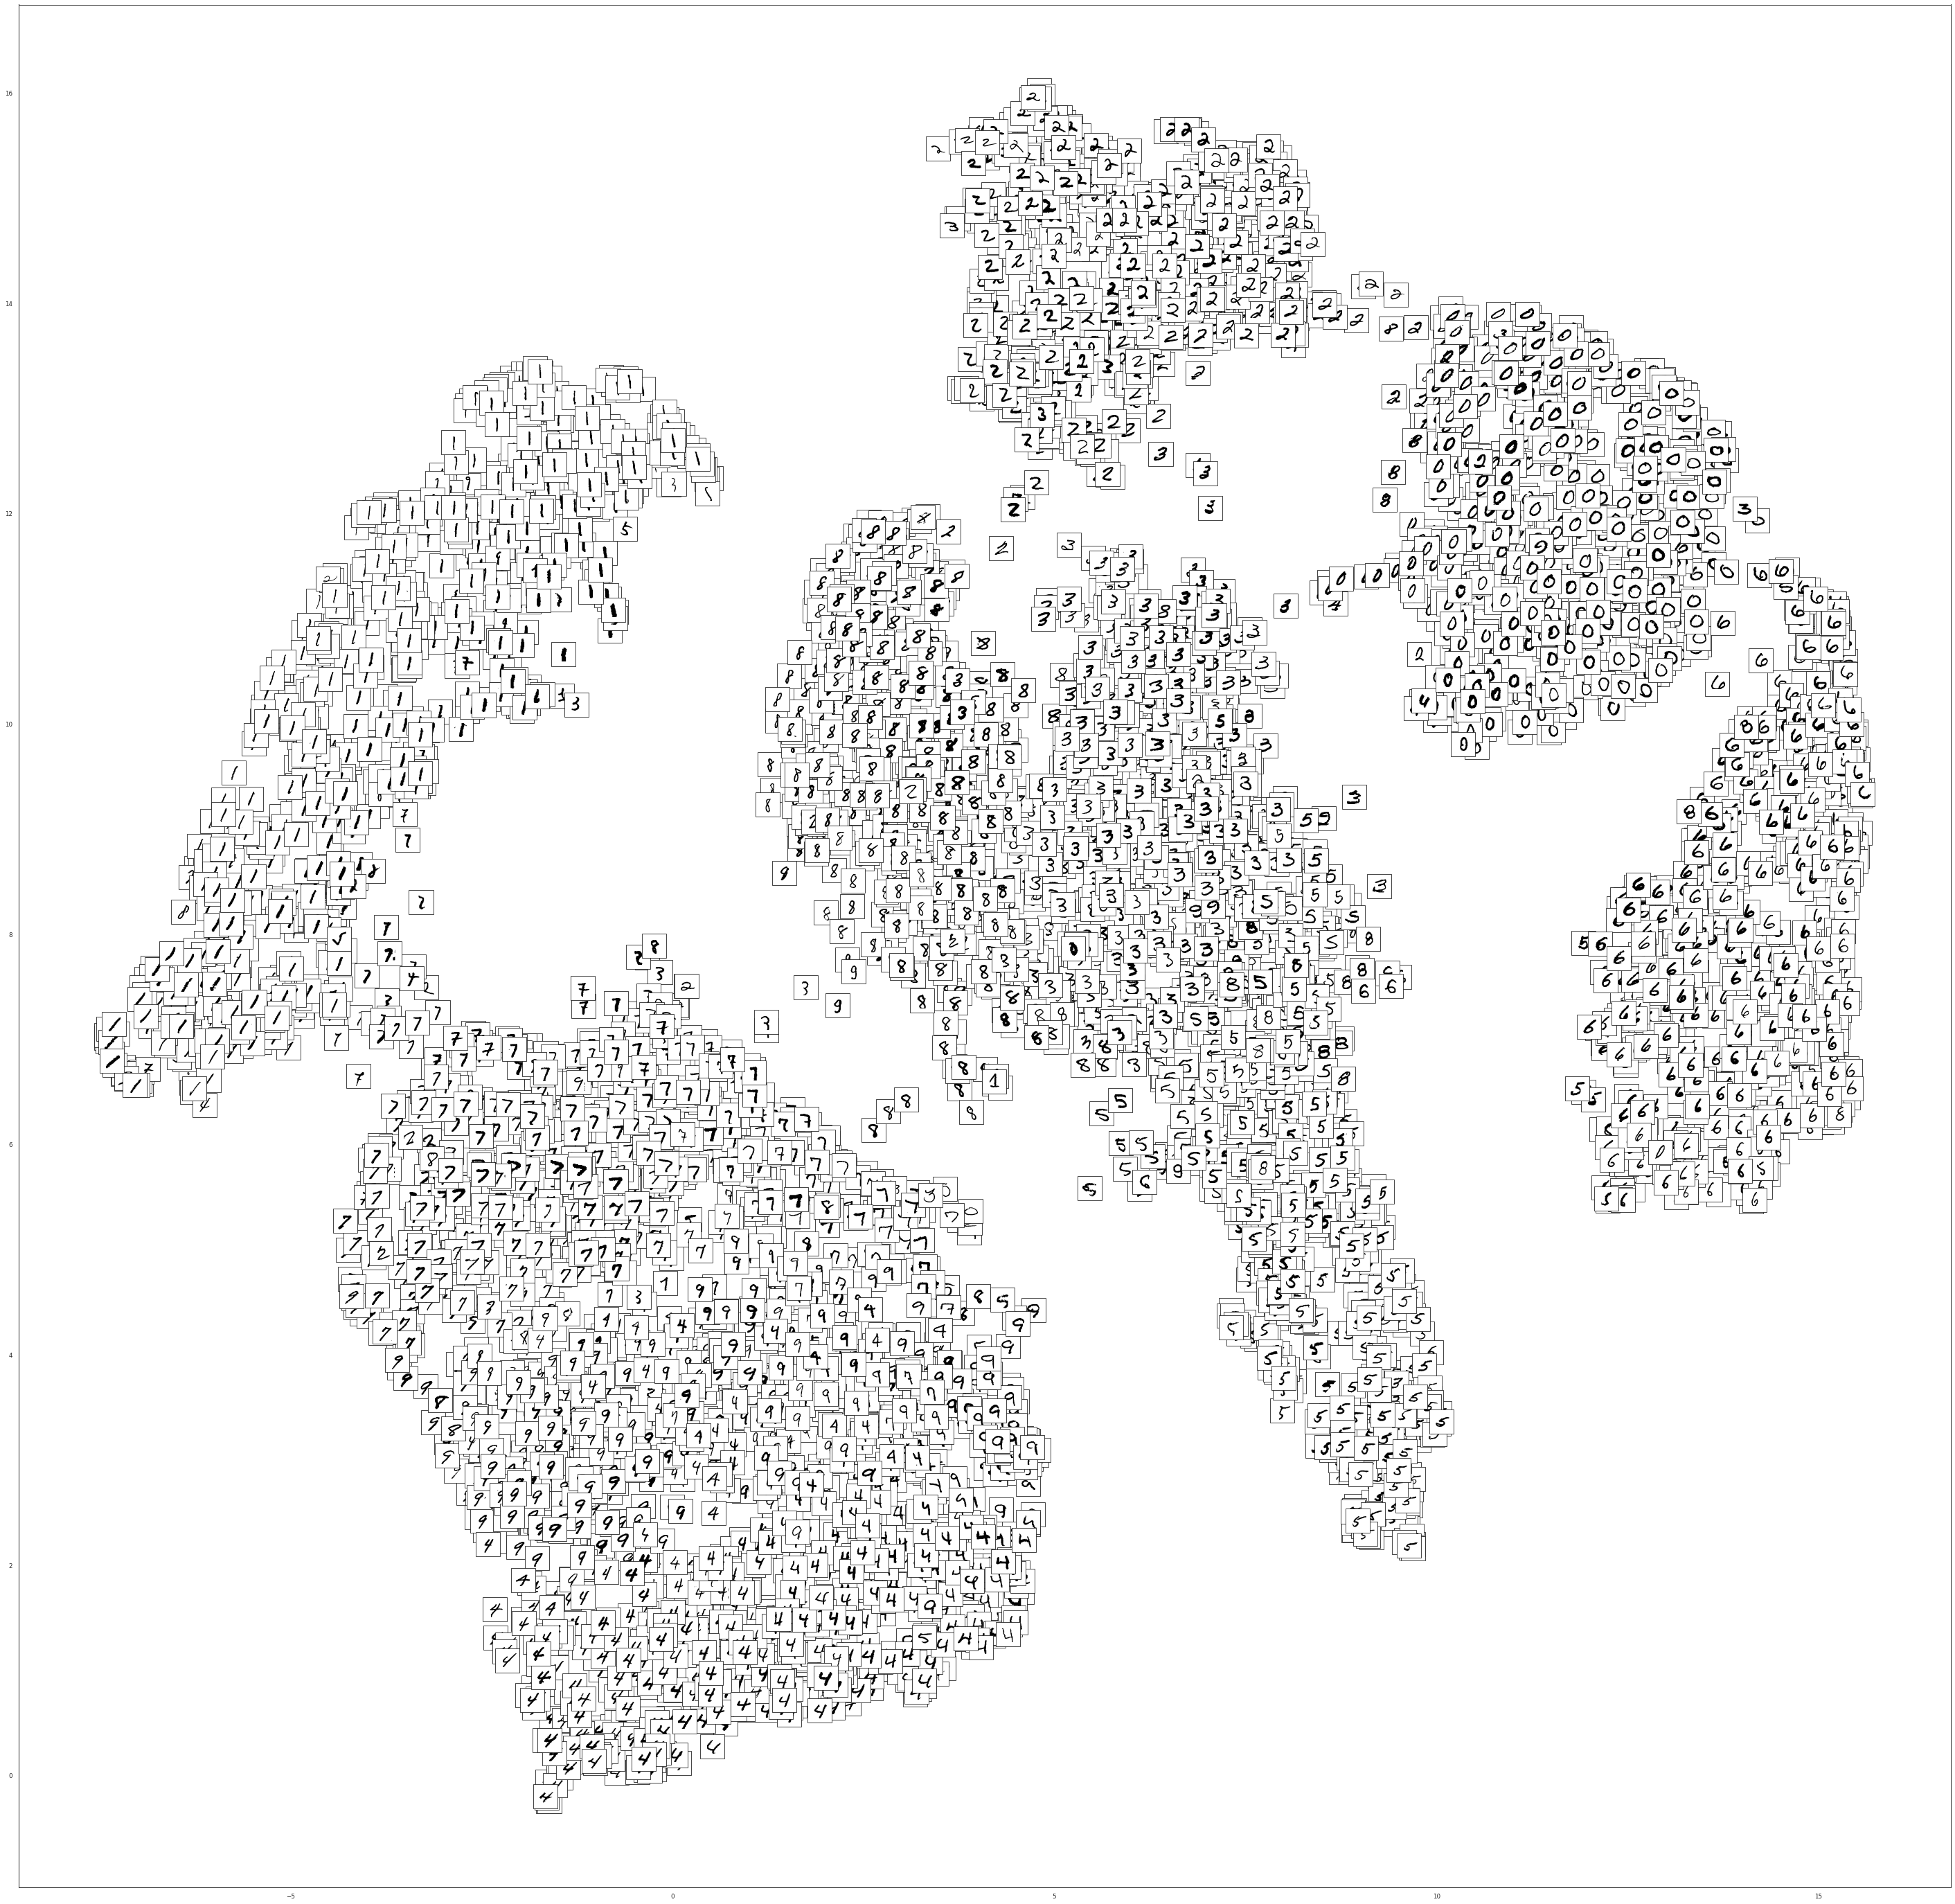

In [ ]:
fig, ax = plt.subplots(figsize=(50, 50))
data_2 = X_test
proj_2 = u_pca_umap
plot_components (data_2, proj_2, images=np.array(data_2).reshape((-1, 28, 28)),ax=ax, thumb_frac=0.00001, cmap='gray_r')

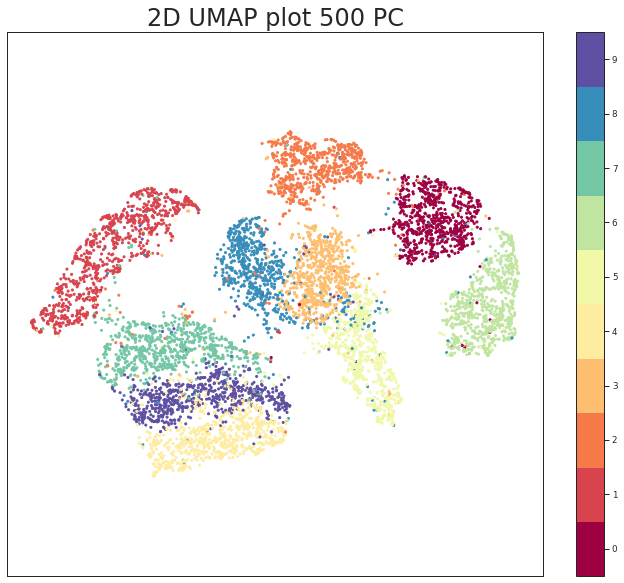

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(u_pca_umap[:, 0], u_pca_umap[:, 1], c=y_test.astype(int), cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.setp(ax, xticks=[], yticks=[])
plt.title('2D UMAP plot 500 PC', fontsize=24);